# 1.Import Libs

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 11 08:25:14 2020
@author: Wesley Pereira da Silva
"""
#import time
#start = time.time()
%matplotlib inline
from IPython.core.display import display, HTML
!pip install deepdiff --quiet3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quiet3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2.Download Dataset

In [2]:
import os
print(os.system("rm -Rf ./input"))
print(os.system('wget http://rii.lcad.inf.ufes.br/wpsilva/datasets/riufes-input-only-docs.tar.gz'))
print(os.system('tar -xf riufes-input-only-docs.tar.gz'))
print(os.system('rm riufes-input-only-docs.tar.gz'))
dfColab = pd.read_csv('RiUfes-Observacoes - pages-sents.csv', header=None)
dfColab.columns = ['document', 'pages', 'type', 'sents', 'dbtype']
dfColab_ = dfColab[dfColab['type'].isin([1,2])]
dfColab.head(3)

0
0
0
0


document  pages  type  sents dbtype
0  10-2028.pdf      1   0.0    2.0    Unl
1  10-2678.pdf      1   0.0   36.0    Unl
2  10-2682.pdf      1   0.0   36.0    Unl

# 3.Setup Dataset

In [3]:
import nltk
nltk.download('stopwords')
import re
nltk.download('rslp')
from sklearn import datasets
from scipy.stats import norm, gamma , zscore
from pprint import pprint 
import os
from nltk.stem import RSLPStemmer
#from nltk import Text
#os.system('touch stop.txt')


stopWords = nltk.corpus.stopwords.words('portuguese')



def formatText (text):
    text = text.replace(',','').replace('.','').replace(':','').replace(';','')
    text = text.replace('!','').replace('?','').replace('\'','').replace('\"','')    
    return text

def removeStopWords (text):
    text = formatText (text)
    #with open('stop.txt','r') as f:
        #stopWords = f.read().replace(' ','').decode("ISO-8859-1").split('\n')        
    text = text.lower().split()
    newText = list()
    for word in text:        
        if word not in stopWords:
            newText.append(word) 
    result = ' '.join(newText)
    return result

def stemmLista(lista):
    st = RSLPStemmer()
    lstemm = []    
    for i in lista:
        texto = i.split()
        corpus =[]
        for token in texto:
            corpus.append(st.stem(token))
            #corpus.append(token)
        k = str(corpus)        
        k = re.sub("\W+", " ", k)        
        k = removeStopWords(k)
        #print('tamanho do texto', len(k))
        lstemm.append(k)
    return lstemm
 

def getdataTeste():    
    path = os.getcwd() # my actual path
    pathFiles = path + '/input/workdir/' # + "*.txt"    
    
    docs_to_train = datasets.load_files(pathFiles, description=None, categories=None, load_content=True, shuffle=True,encoding="UTF-8", decode_error='strict',   random_state=0)
    
    
    #corpus_original = docs_to_train.data.copy()
    #print(len(corpus_original))
    print('depois do load')
    #docs_to_train.data = stemmLista(docs_to_train.data)  
    print('depois do steem')
    return  docs_to_train


def getdataMetaDadosRiUfes():
    os.system('rm ./input/workdir/treino/*.txt')
    os.system("cp ./input/paginas-html/*.html ./input/workdir/treino/")
      
    path = os.getcwd() # my actual path
    pathFiles = path + '/input/workdir/' # + "*.txt"    
    
    docs_to_train = datasets.load_files(pathFiles, description=None, categories=None, load_content=True, shuffle=True, encoding="UTF-8", decode_error='strict', random_state=0)
    #corpus_original = docs_to_train.data.copy()
    #print(len(corpus_original))
    print('depois do load')
    #docs_to_train.data = stemmLista(docs_to_train.data)  
    print('depois do steem')
    return  docs_to_train


def RandomFilesTrain(n):
  os.system('rm ./input/workdir/treino/*.txt')
  os.system("shuf -zn"+str(n)+" -e ./input/corpus/*.txt | xargs -0 cp -vt ./input/workdir/treino/")
    
#corpus = getdataMetaDadosRiUfes()
RandomFilesTrain(4723)
corpus = getdataTeste()



dfPaginas = pd.read_csv("./input/pages.csv", delimiter=';', header=None )
dfPaginas.columns=['id', 'pages']

def CorrigeFileName(corpus):
  corrigido = []
  for nomes in corpus.filenames:
    corrigido.append(nomes.replace('/content/input/workdir/treino/', '').replace('.txt', ''))
    corpus.filenames = corrigido

   
#corpus = getdataTeste()
CorrigeFileName(corpus)
print('qtd data', len(corpus.data))

def GetDocumentByName(name, corpus):
  print(name)
  try:
    local = corpus.filenames.index(name)
    return corpus.data[local]
  except ValueError:
    return ''

def GetNumPageDocument(doc):
  #print(doc)
  return dfPaginas[dfPaginas['id'] == doc]['pages'].values[0]

def GetDocumentByIndex(idx, corpus):  
  print(corpus.filenames[idx])
  try:
    return corpus.data[idx]    
  except ValueError:
    return ''


def SetLabelDocument(n,t):
  corpus.target[n]=t  
  print(n, t)



dataClearbyColab = []
dataClearFilename = []

dfColab_ = dfColab[dfColab['type'].isin([0,1,2,3])]


#dfColab2 = dfColab.reset_index()
for doc in dfColab_['document']:  
  dataClearbyColab.append(corpus.data[corpus.filenames.index(doc)])
  dataClearFilename.append(doc)
len(dataClearbyColab)

corpus.data = dataClearbyColab
corpus.target = dfColab_['type']
corpus.target_names = [0,1,2,3]
corpus.filenames = dataClearFilename


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
depois do load
depois do steem
qtd data 4708


In [4]:
!pip install deepdiff --quiet
from deepdiff import DeepDiff
len(corpus.data)



t1 = corpus.filenames
t2 = dfColab['document']

z  = DeepDiff(t1, t2)


#print(list_of_lists)
def list_diff(list1, list2): 
	return (list(set(list1) - set(list2))) 

# Run Test
jenipapo = list_diff(t1,t2)
len(jenipapo)



     |████████████████████████████████| 61kB 2.0MB/s 


0

# 4.Scan Corpus for Keywords

In [5]:
ScanResults = []


import timeit



keyWordsMsc = ['mestrado', 'mestre', 'master']
keyWordsPhD = ['doutorado', 'doutor', 'doctor']

#for i in range(0, len(copus.data)):
for i in range(100, 2000, 100):
  listWords = {}
  SlicedText = {}
  print('tamanho chunck', i)
  start = timeit.default_timer()
  
  def cortaTexto(n):
    for doc, nome  in zip(corpus.data, corpus.filenames):
      
      textoLimpo = []
      clearText = doc.replace('\n', ' ')
      clearTextTokens = clearText.split(" ")
      for j in clearTextTokens:
        if len(j) !=0:
          textoLimpo.append(j.lower())

      listWords[nome] = " ".join(textoLimpo[0:n])

      #display(HTML(corpus.data[0]))
      #display(HTML(clearText))

  cortaTexto(i)

  sintese = []
  #for i in listWords.keys():
  

  #Your statements here

  stop = timeit.default_timer()
  print('Time: ', stop - start)  
  dTempo = stop - start
  for i in dfColab_.document.values:
    sintese.append((i,len(listWords[i].split(' ')),len(listWords[i]),listWords[i], dTempo))

  dfSintese = pd.DataFrame(sintese, columns=['document', 'words', 'characters', 'text', 'tempo'])
  dfSintese = dfSintese.set_index('document')
  #dfSintese.plot(figsize=(10, 5), kind='scatter', x='characters', y='words')




  dfColab = dfColab.reset_index()
  dfColab = dfColab.set_index('document')
  #dfSintese.head()
  dfMerge = dfColab.join(dfSintese)
  dfMerge.head()



  HaveWordMsc = []
  HaveWordPhD = []
  HaveDbType = []
  print('middle code')

  for i in range(0, len(dfMerge)):
    avaliaMsc = list(set(dfMerge.iloc[i].text.split(" ")).intersection(keyWordsMsc))
    qual = 0
    if len(avaliaMsc) != 0:
      HaveWordMsc.append(1)
      qual = 1
    else:
      HaveWordMsc.append(0)
    avaliaPhD = list(set(dfMerge.iloc[i].text.split(" ")).intersection(keyWordsPhD))
    if len(avaliaPhD) != 0:
      HaveWordPhD.append(1)
      qual = 2
    else:
      HaveWordPhD.append(0)
    HaveDbType.append(qual)
    

  dfMerge['HaveWordMsc'] = HaveWordMsc
  dfMerge['HaveWordPhD'] = HaveWordPhD
  dfMerge['HaveDbType'] = HaveDbType
  dfMerge['Sum_MscPhD'] = dfMerge['HaveWordMsc'] + dfMerge['HaveWordPhD']


  dfMergeLabelHuman = dfMerge[dfMerge['type'].isin([0,1,2,3])]



  print('almost done')

  ScanResults.append([i, dfMergeLabelHuman.groupby('HaveDbType').count()['pages'].values[0],dfMergeLabelHuman.groupby('HaveDbType').count()['pages'].values[1],dfMergeLabelHuman.groupby('HaveDbType').count()['pages'].values[2], dTempo])



tamanho chunck 100
Time:  58.12874675900002
middle code
almost done
tamanho chunck 200
Time:  59.041344193999976
middle code
almost done
tamanho chunck 300
Time:  57.698083301000224
middle code
almost done
tamanho chunck 400
Time:  58.67335050600013
middle code
almost done
tamanho chunck 500
Time:  58.3228546549999
middle code
almost done
tamanho chunck 600
Time:  60.24913328299999
middle code
almost done
tamanho chunck 700
Time:  61.28020606000018
middle code
almost done
tamanho chunck 800
Time:  58.62909628899979
middle code
almost done
tamanho chunck 900
Time:  60.65697541999998
middle code
almost done
tamanho chunck 1000
Time:  59.46061540599976
middle code
almost done
tamanho chunck 1100
Time:  59.182104897000045
middle code
almost done
tamanho chunck 1200
Time:  60.47053285700031
middle code
almost done
tamanho chunck 1300
Time:  59.46794915700002
middle code
almost done
tamanho chunck 1400
Time:  59.43374929299989
middle code
almost done
tamanho chunck 1500
Time:  59.24240837199

# 4.1.Time Scan

In [6]:
dfScanQtd = pd.DataFrame(ScanResults, columns=['words', 'Unl', 'Msc', 'PhD', 'seconds'])
coluFix = []
for i in range(100, 2000, 100):
  coluFix.append(i)

dfScanQtd['words'] = coluFix

[Text(0, 0.5, 'identified quantity'), Text(0.5, 0, 'time scanning')]

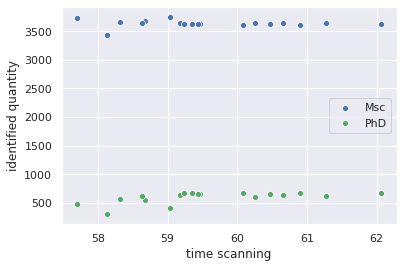

In [7]:
#sns.catplot(data=dfScanQtd)

#sns.scatterplot(data=dfScanQtd, x='tempo', y='Msc')
#ax.set_label(['Unl', 'Msc', 'PhD'])
#ax= sns.scatterplot(data=dfScanQtd, x='seconds', y='Unl',color='r',label='Unl')
ax = sns.scatterplot(data=dfScanQtd, x='seconds', y='Msc',color='b',label='Msc')
ax = sns.scatterplot(data=dfScanQtd, x='seconds', y='PhD',color='g', label='PhD')

ax.set(xlabel='time scanning', ylabel='identified quantity')


#sns.regplot(data=dfScanQtd, x='tempo', y='PhD', color='g')
#sns.regplot(data=dfScanQtd, x='tempo', y='Unl', color='y')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd353af6be0>,
      dtype=object)

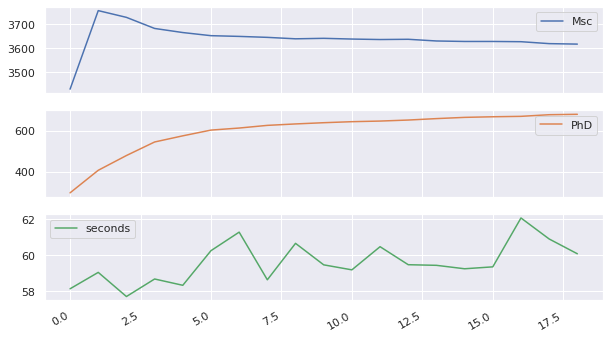

In [8]:
dfScanQtd[['Msc', 'PhD',  'seconds']].plot(kind='line', figsize=(10,6), subplots=True,  legend=True, grid=True)

# 4.2.Word Scan

[Text(0, 0.5, 'identified quantity'), Text(0.5, 0, 'words')]

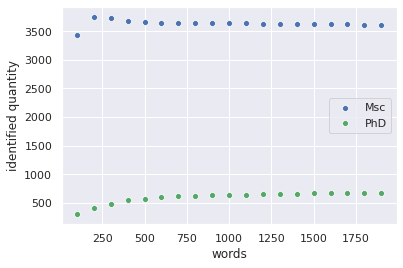

In [9]:
#ax= sns.scatterplot(data=dfScanQtd, x='words', y='Unl',color='r',label='Unl')
ax = sns.scatterplot(data=dfScanQtd, x='words', y='Msc',color='b',label='Msc')
ax = sns.scatterplot(data=dfScanQtd, x='words', y='PhD',color='g', label='PhD')

ax.set(xlabel='words', ylabel='identified quantity')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3521901d0>,
      dtype=object)

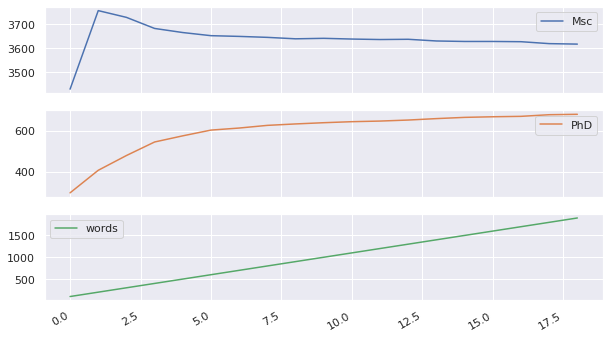

In [10]:
dfScanQtd[['Msc', 'PhD', 'words']].plot(kind='line', figsize=(10,6), subplots=True,  legend=True, grid=True)

In [11]:
dfMergeLabelHuman__ = dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1,2])]
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#dfColab_ = dfColab[dfColab['type'].isin([0,1,2,3])]
X = dfColab_['pages'].values
X = dfMergeLabelHuman__[['HaveWordMsc'	,'HaveWordPhD', 'pages']].values
X = X.reshape(-1, 3)
#y = dfColab_['type'].values
y = dfMergeLabelHuman__[['type']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
conjunto = [X_train, X_test, y_train, y_test]
for conj in conjunto:
  print(conj.shape)




(367, 3)
(92, 3)
(367, 1)
(92, 1)


# 5.1.Observed Distributions

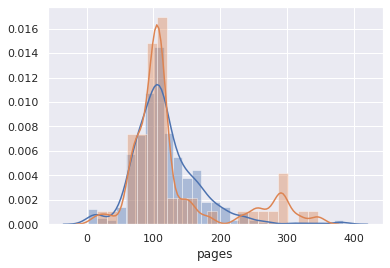

In [16]:
ax = sns.distplot(dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1])]['pages'], rug=False, label='PhD')
ax = sns.distplot(dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([2])]['pages'], rug=False, label='PhD')


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_similarity

#documents = corpus.data 
documents = dfMergeLabelHuman.text.values


vectorizer =  TfidfVectorizer() # TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
X.shape

(4708, 163522)

In [18]:
def AvaliaSimilaridade(x):
  x = CalcSimilaridadeInterna(x)
  #z = pd.Series(x)
  #x.hist()
  #z.hist()
  return np.mean(x) #np.mean(np.mean(x))

def CalcSimilaridadeInterna(x):
  return pd.DataFrame(cosine_similarity(x))

#resp = CalcSimilaridadeInterna(X)



# 5.2.Fit with Normal Distributions

In [19]:
def classify(n, bias, mu):
	n = np.array(n)
	prob = 1 / (1 + np.exp(-mu))
	return prob, prob > bias

def castNome(x):
    return {
        1:'Msc',
        2: 'PhD',
        0: 'Unl',
        3: 'Mis'        
    }.get(x,'not found' ) 
dic = {}

for i in [1,2]:
  dic['n-'+castNome(i)] = norm.fit(dfColab[dfColab['type']==i]['pages'])
  dic['g-'+castNome(i)] = gamma.fit(dfColab[dfColab['type']==i]['pages'])

dic

{'g-Msc': (12.423512124594211, -51.15652716687735, 13.583316562656737),
 'g-PhD': (0.6400812523579948, 15.999999999999996, 6.787330536452883),
 'n-Msc': (117.5959595959596, 49.86743420085042),
 'n-PhD': (129.61904761904762, 73.08994862201753)}

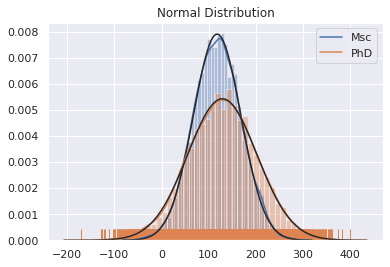

In [20]:
from scipy.stats import norm, gamma


for i, tipo in zip([1,2],  ['n-Msc', 'n-PhD']):
  samples = norm.rvs(size=10000, loc=dic[tipo][0], scale=dic[tipo][1])
  samples = pd.Series(samples)
  data = dfColab[dfColab['type'].isin([i])]['pages'].values 
  
  
  #g = sns.distplot(data,rug=True, kde_kws={ "label": tipo.replace('n-', 'Real Data-')})
  x = np.linspace (0, 500, 100) 
  #samples = x
  g = sns.distplot(samples,rug=True, kde_kws={ "label": tipo.replace('n-', '')}, fit=norm)
  #g.set_
  g.set_title('Normal Distribution')

# 5.3.Fit with Gamma Distributions

5.560972585586329
Original data:  [2, 10, 11, 11, 12, 12, 14, 17, 19, 19, 34, 43, 49, 50, 51, 51, 52, 52, 54, 56, 59, 61, 63, 63, 64, 64, 65, 65, 66, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 70, 70, 70, 70, 70, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 74, 74, 74, 75, 77, 77, 77, 78, 78, 78, 78, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 84, 84, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 89, 90, 90, 90, 90, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 94, 95, 95, 95, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 100, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 104, 105, 105, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 109, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 114, 114

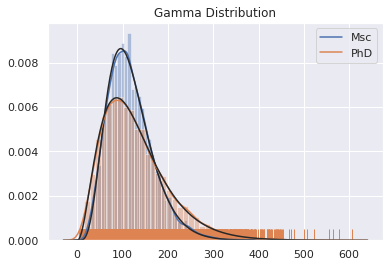

In [21]:


#for dist, tipo in zip(['gamma-Msc', 'gamma-PhD'],[1,2]):  

dists = ['Msc', 'PhD']
import random
import numpy


for i, tipo in zip([1,2],  ['n-Msc', 'n-PhD']):
  data = dfColab[dfColab['type'].isin([i])]['pages'].values   # [6176, 11046, 670, 6146, 7945, 6864, 767, 7623, 7212, 9040, 3213, 6302, 10044, 10195, 9386, 7230, 4602, 6282, 8619, 7903, 6318, 13294, 6990, 5515, 9157]

  # Fit gamma distribution through mean and average
  mean_of_distribution = numpy.mean(data)
  variance_of_distribution = numpy.var(data)

  def gamma_random_sample(mean, variance, size):
      """Yields a list of random numbers following a gamma distribution defined by mean and variance"""
      g_alpha = mean*mean/variance    
      print(g_alpha)
      g_beta = mean/variance
      for i in range(size):
          yield random.gammavariate(g_alpha,1/g_beta)

  # force integer values to get integer sample
  #grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,len(data))]
  grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,10000)]

  print("Original data: ", sorted(data))
  print("Random sample: ", sorted(grs))
  #g = sns.distplot(data,rug=True, kde_kws={ "label": tipo.replace('n-', '')}  )

  samples = pd.Series(grs)
  #sns.distplot(samples)  
  #x = np.linspace (0, 500, 1000) 
  #samples = x
  g = sns.distplot(samples,rug=True, kde_kws={ "label": tipo.replace('n-', '')}, fit=gamma )
  g.set_title('Gamma Distribution')
  

# 5.4 Observed and Fit Distributions

5.560972585586329
Original data:  [2, 10, 11, 11, 12, 12, 14, 17, 19, 19, 34, 43, 49, 50, 51, 51, 52, 52, 54, 56, 59, 61, 63, 63, 64, 64, 65, 65, 66, 67, 67, 68, 68, 68, 68, 68, 69, 69, 69, 70, 70, 70, 70, 70, 71, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 74, 74, 74, 75, 77, 77, 77, 78, 78, 78, 78, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 82, 82, 82, 82, 82, 84, 84, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 89, 90, 90, 90, 90, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 94, 95, 95, 95, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 98, 98, 98, 98, 99, 99, 99, 99, 99, 99, 99, 100, 101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 103, 103, 103, 104, 105, 105, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 107, 107, 107, 108, 108, 108, 108, 108, 108, 108, 109, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 114, 114

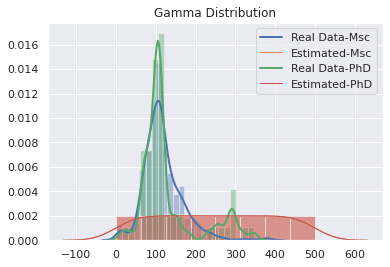

In [22]:


#for dist, tipo in zip(['gamma-Msc', 'gamma-PhD'],[1,2]):  

dists = ['Msc', 'PhD']
import random
import numpy


for i, tipo in zip([1,2],  ['g-Msc', 'g-PhD']):
  data = dfColab[dfColab['type'].isin([i])]['pages'].values   # [6176, 11046, 670, 6146, 7945, 6864, 767, 7623, 7212, 9040, 3213, 6302, 10044, 10195, 9386, 7230, 4602, 6282, 8619, 7903, 6318, 13294, 6990, 5515, 9157]

  # Fit gamma distribution through mean and average
  mean_of_distribution = numpy.mean(data)
  variance_of_distribution = numpy.var(data)

  def gamma_random_sample(mean, variance, size):
      """Yields a list of random numbers following a gamma distribution defined by mean and variance"""
      g_alpha = mean*mean/variance    
      print(g_alpha)
      g_beta = mean/variance
      for i in range(size):
          yield random.gammavariate(g_alpha,1/g_beta)

  
  # force integer values to get integer sample
  #grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,len(data))]
  grs = [int(i) for i in gamma_random_sample(mean_of_distribution,variance_of_distribution,500)]

  print("Original data: ", sorted(data))
  print("Random sample: ", sorted(grs))
  g = sns.distplot(data,rug=False, kde_kws={"lw": 2, "label": tipo.replace('g-', 'Real Data-')} )

  samples = pd.Series(grs)
  x = np.linspace (0, 500, 500) 
  samples = x
  
  #sns.distplot(samples)  
  g = sns.distplot(samples,rug=False, kde_kws={"lw": 1, "label": tipo.replace('g-', 'Estimated-')} )
  g.set_title('Gamma Distribution')
  

# 6.1.Page Classification

In [23]:
#dfMergeLabelHuman['pagesScaled'] = (dfMergeLabelHuman['pages'] - dfMergeLabelHuman['pages'].min()) / (dfMergeLabelHuman['pages'].max() - dfMergeLabelHuman['pages'].min())
dfMergeLabelHumanMscPhD = dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1,2])]
rodadas = [['pages'], ['pages', 'HaveWordMsc'	,'HaveWordPhD' ]] 
features = rodadas[0]
#X = dfMergeLabelHuman[['HaveWordMsc'	,'HaveWordPhD', 'pages']].values
X = dfMergeLabelHumanMscPhD[features].values
X = X.reshape(-1, len(features))
#y = dfColab_['type'].values
y = dfMergeLabelHumanMscPhD[['type']].values
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.30, random_state=42) 
for t in [X_train, X_test, y_train, y_test]:
  print(t.shape)

(321, 1)
(138, 1)
(321,)
(138,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


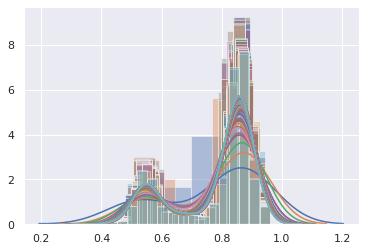

In [24]:
from sklearn.naive_bayes import GaussianNB
resultadoPages = []

#X = X.toarray()

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.30, random_state=i) 
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  clf.get_params()
  y_pred = clf.predict(X_test)  

  y_score = clf.score(X_train, y_train)    
  y_pred = clf.predict(X_test)
    
  
  acc = accuracy_score(y_test, y_pred)
  precision_Macro = precision_score(y_test, y_pred, average='macro')
  precision_Micro = precision_score(y_test, y_pred, average='micro')
  precision_weighted = precision_score(y_test, y_pred, average='weighted')
  recall_score_Macro = recall_score(y_test, y_pred, average='macro')
  recall_score_Micro = recall_score(y_test, y_pred, average='micro')
  recall_score_weighted = recall_score(y_test, y_pred, average='weighted')
  f1_Macro  =   f1_score(y_test, y_pred, average='macro')
  f1_Micro  =   f1_score(y_test, y_pred, average='micro')
  f1_weighted  =   f1_score(y_test, y_pred, average='weighted')

  resultadoPages.append((acc, precision_Macro,precision_Micro, precision_weighted,recall_score_Macro,
                         recall_score_Micro,recall_score_weighted, f1_Macro,f1_Micro, f1_weighted ))

  temp = pd.DataFrame(resultadoPages, columns=['acc', 'precision_Macro','precision_Micro', 'precision_weighted','recall_score_Macro',                       'recall_score_Micro','recall_score_weighted', 'f1_Macro','f1_Micro','f1_weighted' ])
  sns.distplot(temp)


acc                      0.865072
precision_Macro          0.702386
precision_Micro          0.865072
precision_weighted       0.832952
recall_score_Macro       0.548344
recall_score_Micro       0.865072
recall_score_weighted    0.865072
f1_Macro                 0.553591
f1_Micro                 0.865072
f1_weighted              0.827319
dtype: float64

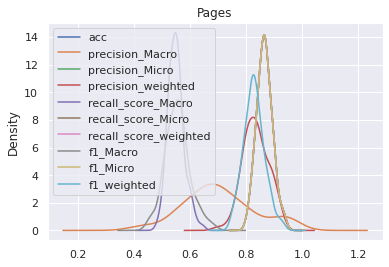

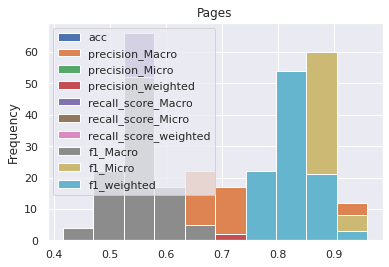

In [25]:
temp.plot(kind='kde', title='Pages')
temp.plot(kind='hist',  title='Pages')
temp.mean()

# 6.2 Min Classification

In [26]:
dfMergeLabelHumanMscPhD = dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1,2])]
rodadas = [['pages'], ['pages', 'HaveWordMsc'	,'HaveWordPhD' ]] 
features = rodadas[1]
X = dfMergeLabelHumanMscPhD[features].values
X = X.reshape(-1, len(features))
y = dfMergeLabelHumanMscPhD[['type']].values
X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.30, random_state=42) 
for t in [X_train, X_test, y_train, y_test]:
  print(t.shape)

(321, 3)
(138, 3)
(321,)
(138,)


In [27]:
joinTemp  = []
joinTemp.append(temp.copy())

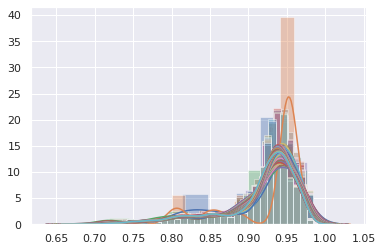

In [28]:
from sklearn.naive_bayes import GaussianNB
resultadoPages = []

#X = X.toarray()

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.30, random_state=i) 
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  clf.get_params()
  y_pred = clf.predict(X_test)  

  y_score = clf.score(X_train, y_train)    
  y_pred = clf.predict(X_test)
    
  
  acc = accuracy_score(y_test, y_pred)
  precision_Macro = precision_score(y_test, y_pred, average='macro')
  precision_Micro = precision_score(y_test, y_pred, average='micro')
  precision_weighted = precision_score(y_test, y_pred, average='weighted')
  recall_score_Macro = recall_score(y_test, y_pred, average='macro')
  recall_score_Micro = recall_score(y_test, y_pred, average='micro')
  recall_score_weighted = recall_score(y_test, y_pred, average='weighted')
  f1_Macro  =   f1_score(y_test, y_pred, average='macro')
  f1_Micro  =   f1_score(y_test, y_pred, average='micro')
  f1_weighted  =   f1_score(y_test, y_pred, average='weighted')

  resultadoPages.append((acc, precision_Macro,precision_Micro, precision_weighted,recall_score_Macro,
                         recall_score_Micro,recall_score_weighted, f1_Macro,f1_Micro, f1_weighted ))

  temp = pd.DataFrame(resultadoPages, columns=['acc', 'precision_Macro','precision_Micro', 'precision_weighted','recall_score_Macro',                       'recall_score_Micro','recall_score_weighted', 'f1_Macro','f1_Micro','f1_weighted' ])
  sns.distplot(temp)

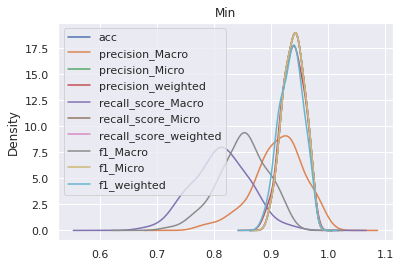

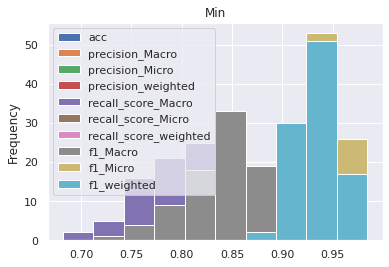

In [29]:
temp.plot(kind='kde', title='Min')
temp.plot(kind='hist', title='Min')
temp.mean()
joinTemp.append(temp.copy())

# 6.3.Classify by BOW

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.pairwise import cosine_similarity

#documents = corpus.data 
#documents = dfMergeLabelHuman.text.values

documents = dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1,2])]['text']
vectorizer =  TfidfVectorizer(stop_words=stopWords) # TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
y = dfMergeLabelHuman[dfMergeLabelHuman['type'].isin([1,2])]['type']


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

lectures = documents # ["this is some food", "this is some drink"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(lectures)
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 100
top_features = [features[i] for i in indices[:top_n]]
for i in top_features:
  #print (i)
  pass

X.shape

(459, 49593)

In [32]:
from sklearn.naive_bayes import GaussianNB


resultadoPages = []

X = X.toarray()

for i in range(0,100):
  X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.30, random_state=i) 
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  clf.get_params()
  y_pred = clf.predict(X_test)  

  y_score = clf.score(X_train, y_train)    
  y_pred = clf.predict(X_test)
    
  
  acc = accuracy_score(y_test, y_pred)
  precision_Macro = precision_score(y_test, y_pred, average='macro')
  precision_Micro = precision_score(y_test, y_pred, average='micro')
  precision_weighted = precision_score(y_test, y_pred, average='weighted')
  recall_score_Macro = recall_score(y_test, y_pred, average='macro')
  recall_score_Micro = recall_score(y_test, y_pred, average='micro')
  recall_score_weighted = recall_score(y_test, y_pred, average='weighted')
  f1_Macro  =   f1_score(y_test, y_pred, average='macro')
  f1_Micro  =   f1_score(y_test, y_pred, average='micro')
  f1_weighted  =   f1_score(y_test, y_pred, average='weighted')

  resultadoPages.append((acc, precision_Macro,precision_Micro, precision_weighted,recall_score_Macro,
                         recall_score_Micro,recall_score_weighted, f1_Macro,f1_Micro, f1_weighted ))

  temp = pd.DataFrame(resultadoPages, columns=['acc', 'precision_Macro','precision_Micro', 'precision_weighted','recall_score_Macro',                       'recall_score_Micro','recall_score_weighted', 'f1_Macro','f1_Micro','f1_weighted' ])
  

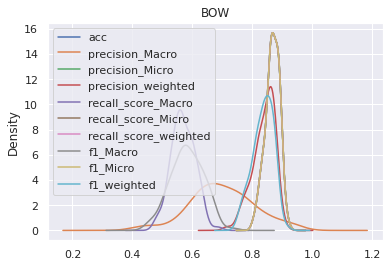

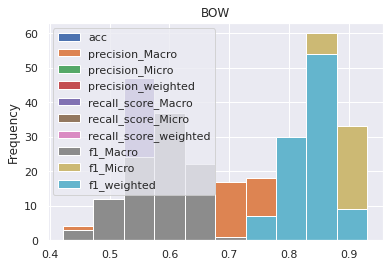

In [33]:
temp.plot(kind='kde', title='BOW')
temp.plot(kind='hist', title='BOW')
temp.mean()
joinTemp.append(temp.copy())

In [34]:
len(joinTemp)

dfJoinTemp = pd.concat(joinTemp)
dfJoinTemp

acc  precision_Macro  precision_Micro  ...  f1_Macro  f1_Micro  f1_weighted
0   0.876812         0.551128         0.876812  ...  0.519558  0.876812     0.849792
1   0.891304         0.701493         0.891304  ...  0.576080  0.891304     0.862166
2   0.869565         0.687500         0.869565  ...  0.514844  0.869565     0.821467
3   0.840580         0.724812         0.840580  ...  0.562788  0.840580     0.795123
4   0.869565         0.660851         0.869565  ...  0.589286  0.869565     0.844979
..       ...              ...              ...  ...       ...       ...          ...
95  0.811594         0.613534         0.811594  ...  0.513821  0.811594     0.756451
96  0.862319         0.736090         0.862319  ...  0.582151  0.862319     0.825128
97  0.869565         0.863686         0.869565  ...  0.663415  0.869565     0.839024
98  0.891304         0.654887         0.891304  ...  0.576080  0.891304     0.867464
99  0.818841         0.666667         0.818841  ...  0.545754  0.818841     0.770349

[300 rows x 10 columns]

[[110   3]
 [ 22   3]]
110 3 22 3
                 [BOW] - Classification Report
              precision    recall  f1-score   support

         Msc       0.83      0.97      0.90       113
         PhD       0.50      0.12      0.19        25

    accuracy                           0.82       138
   macro avg       0.67      0.55      0.55       138
weighted avg       0.77      0.82      0.77       138



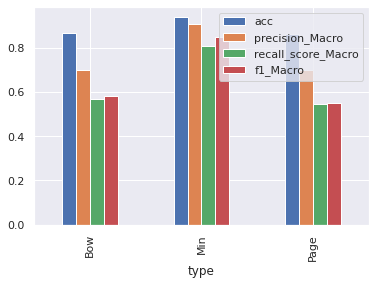

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))
print(tn, fp, fn, tp)
target_names = ['Msc', 'PhD']
print('                 [BOW] - Classification Report')
print(classification_report(y_test, y_pred, target_names=target_names))



temp.mean()
joinTemp.append(temp.copy())

len(joinTemp)
joinTemp[0]['type']='Page'
joinTemp[1]['type']='Min'
joinTemp[2]['type']='Bow'

dfJoinTemp = pd.concat(joinTemp)
dfJoinTemp[['acc', 'precision_Macro',
       'recall_score_Macro',
       'f1_Macro', 'type']].groupby('type').mean().plot(kind='bar')

dfJoinTemp.groupby('type').mean().to_csv('sitnese.csv', sep=';')

#dfJoinTemp.to_csv('metrics300.csv', sep=';')

teste = dfJoinTemp.groupby('type').mean().T




7.Benchmakr

In [37]:

dfJoinTemp[['acc', 'precision_weighted',
       'recall_score_weighted',
       'f1_weighted', 'type']].groupby('type').mean().T

dfJoinTemp.columns
dfJoinTemp[['acc', 'precision_Macro',
       'recall_score_Macro',
       'f1_Macro', 'type']].groupby('type').mean().T

type                     Bow       Min      Page
acc                 0.867609  0.939928  0.865072
precision_Macro     0.700259  0.912179  0.702386
recall_score_Macro  0.569666  0.811795  0.548344
f1_Macro            0.582913  0.849932  0.553591

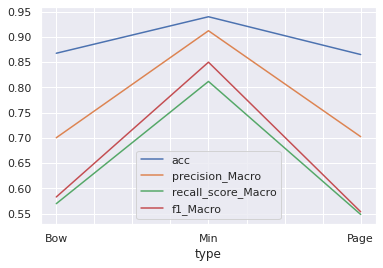

In [41]:
dfJoinTemp[['acc', 'precision_Macro',
       'recall_score_Macro',
       'f1_Macro', 'type']].groupby('type').mean().plot()